<a href="https://colab.research.google.com/github/IsraelPanazollo/Analise_de_Series_Temporais/blob/main/An%C3%A1lise_S%C3%A9rie_Temporal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>ANÁLISE DE SÉRIES TEMPORAIS</font>
***

# Importação das Bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

## Verificação das versões

In [2]:
print('Versão do pandas -> %s' % pd.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do scipy -> %s' % scipy.__version__)

Versão do pandas -> 2.0.3
Versão do seaborn -> 0.13.1
Versão do scipy -> 1.11.4


# Conjunto de Dados

Este conjunto de dados foi proporciando pela Alura no qual há um série de informações sobre uma empresa fictícia. O objetivo desses estudos é explorar os dados e obter alguns insights e sugerir planos de ação.

# Estudo nos dados de vendas mensais

No arquivo dados_vendas estão presentes os registros mensais referentes ao ano de 2014 e 2015 das vendas em milhares de reais.

In [3]:
dados_vendas = pd.read_csv('dados_vendas.csv', sep = ';')

In [4]:
dados_vendas.head()

,Mê,Vendas em mil R$
0,01/jan/14,10
1,01/fev/14,20
2,01/mar/14,33
3,01/abr/14,47
4,01/mai/14,63


Para facilitar a compreensão e as operações com os dados foram renomeadas as colunas

In [5]:
dados_vendas = dados_vendas.rename(columns = {'Mê' : 'Mes', 'Vendas em mil R$':'Vendas'})

In [6]:
dados_vendas.head()

,Mes,Vendas
0,01/jan/14,10
1,01/fev/14,20
2,01/mar/14,33
3,01/abr/14,47
4,01/mai/14,63


Verificar o número de registros, o tipo de dados nos campos e constatar a presença de valores NA é uma etapa básica nas análises dos dados. E aqui já verifica-se que não há dados faltantes e que se trata de 2 anos de dados de vendas

In [7]:
dados_vendas.shape

(24, 2)

In [8]:
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mes     24 non-null     object
 1   Vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


Os dados no mês podem ser ajustados com o formato datetime para facilitar as análises. Para tanto foi preciso criar um dicionário dos meses e implementar uma transformação nesses registros.

In [9]:
abreviacao_map = {
    'jan': 'Jan',
    'fev': 'Feb',
    'mar': 'Mar',
    'abr': 'Apr',
    'mai': 'May',
    'jun': 'Jun',
    'jul': 'Jul',
    'ago': 'Aug',
    'set': 'Sep',
    'out': 'Oct',
    'nov': 'Nov',
    'dez': 'Dec'
}

In [10]:
dados_vendas['Data'] = pd.to_datetime(dados_vendas['Mes'].str.lower().replace(abreviacao_map, regex=True), format = '%d/%b/%y')

In [11]:
dados_vendas = dados_vendas.drop('Mes', axis=1)

In [12]:
dados_vendas.head()

,Vendas,Data
0,10,2014-01-01
1,20,2014-02-01
2,33,2014-03-01
3,47,2014-04-01
4,63,2014-05-01


Realiza-se uma visualização das vendas no tempo e constata-se um crescimento considerável no tempo. O gráfico ajuda a enxergar a forma que os dados se apresentam e descrever o que cada eixo representa ajuda a deixar clara a mensagem

In [13]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

<Axes: title={'center': 'Vendas por mês'}, xlabel='Meses', ylabel='Vendas por mil R$'>

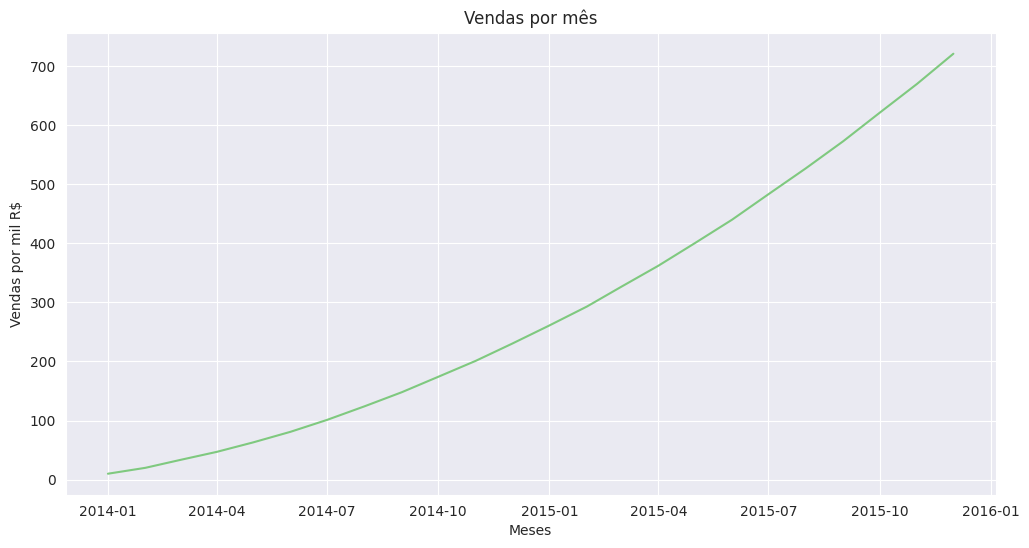

In [14]:
ax = sns.lineplot(x = 'Data', y = 'Vendas', data = dados_vendas)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas por mês')
ax.set_xlabel('Meses')
ax.set_ylabel('Vendas por mil R$')
ax

O gráfico indica um crescimento, mas para saber de que tipo de crescimento se trata e para não incorrer numa interpretação equivocada apenas pela forma do gráfico, utiliza-se as informações de aumento e aceleração. O aumento é a diferença de vendas de uma mês com relação ao outro. A aceleração é a diferença entre os aumentos de uma mês para outro.

In [15]:
dados_vendas['Aumento'] = dados_vendas['Vendas'].diff()

In [16]:
dados_vendas.head()

,Vendas,Data,Aumento
0,10,2014-01-01,NaN
1,20,2014-02-01,10.0
2,33,2014-03-01,13.0
3,47,2014-04-01,14.0
4,63,2014-05-01,16.0


In [17]:
dados_vendas['Aceleracao'] = dados_vendas['Aumento'].diff()

In [18]:
dados_vendas.head()

,Vendas,Data,Aumento,Aceleracao
0,10,2014-01-01,NaN,NaN
1,20,2014-02-01,10.0,NaN
2,33,2014-03-01,13.0,3.0
3,47,2014-04-01,14.0,1.0
4,63,2014-05-01,16.0,2.0


As informações das vendas, do aumento e da acelaração podem ser vistas graficamente. Aqui já constata-se que o aumento tem uma característica ascendente ou seja as vendas estão subindo fortemente no passar do tempo. A aceleração mostra o comportamento do aumento, indicando que este aumento vai mudando no tempo, isto é, há períodos com maior aumento do que outros e até de diminuição do aumento, mas não aumento negativo ou decremento.

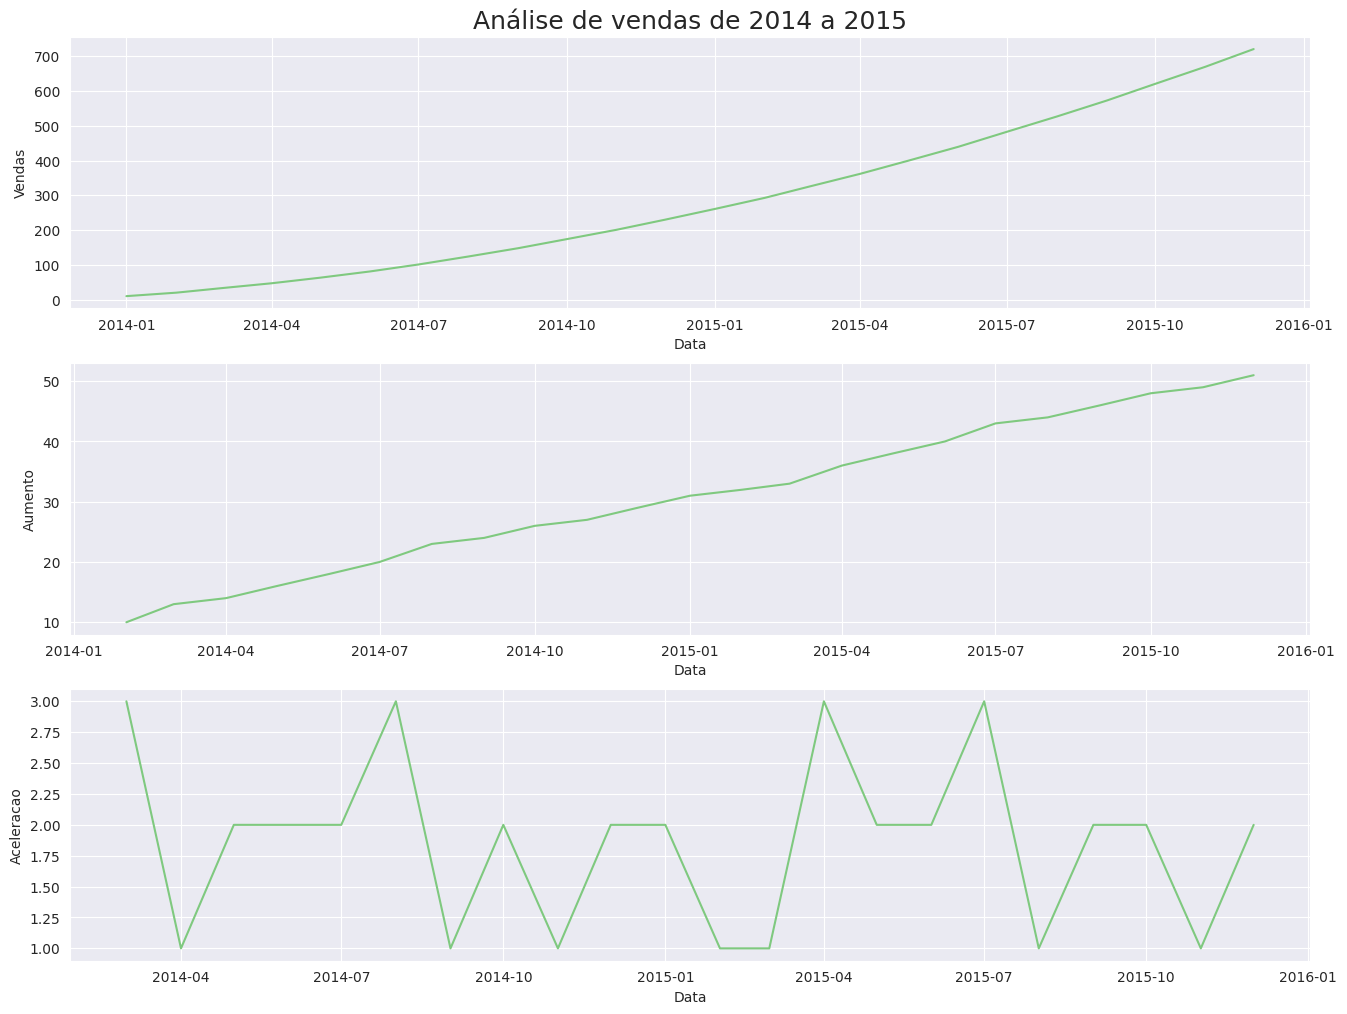

In [19]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas de 2014 a 2015', fontsize=18)
sns.lineplot(x='Data', y='Vendas', data=dados_vendas)
plt.subplot(3,1,2)
sns.lineplot(x='Data', y='Aumento', data=dados_vendas)
plt.subplot(3,1,3)
sns.lineplot(x='Data', y='Aceleracao', data=dados_vendas)
ax = ax

Outra análise que pode ser feita é a de autocorrelação. Nesse caso deseja-se saber se a venda de cada mês possui uma correlação com a de outros meses. Nota-se que as vendas de meses próximos possuem uma alta autocorrelação, indicada pelo lag dos valores baixos, mas na medida que o tempo que passa a autocorrelação diminui e vai a zero, assim não se percebe grandes efeitos sazonais a longo prazo.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

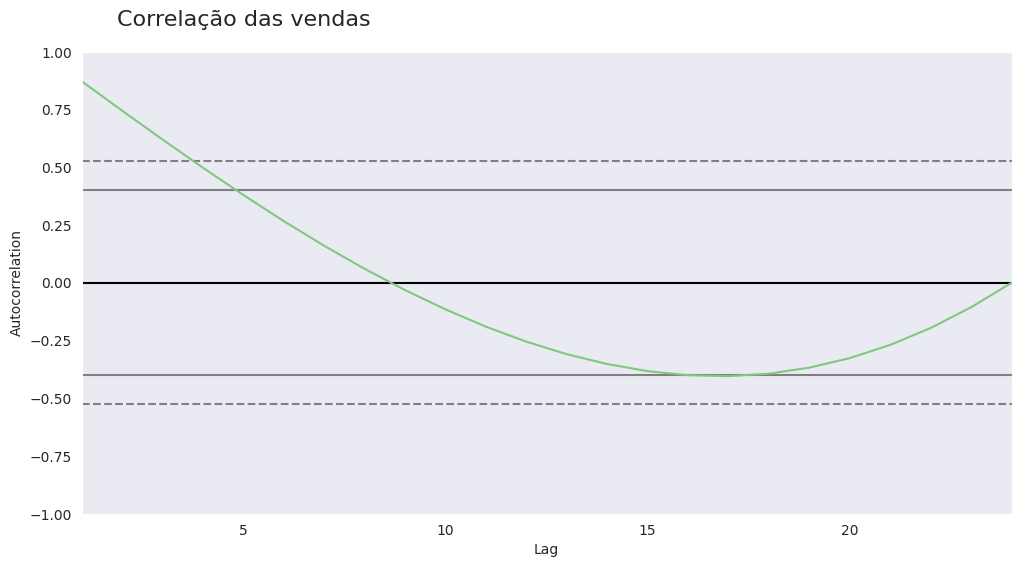

In [20]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize = 16, x=0.26, y=0.95)
pd.plotting.autocorrelation_plot(dados_vendas['Vendas'])

# Estudo nos dados das vendas anuais de um produto

Os dados_produto referem-se as vendas mensais de um produto específico contabilizadas durantes 3 anos. Serão realizados alguns tratamentos para que os dados fiquem mais fáceis de trabalhar e entender>

In [21]:
dados_produto = pd.read_csv('dados_produto.csv',sep=';')

In [22]:
dados_produto.head()

,Mê,Produto
0,01/jan/13,13
1,01/fev/13,19
2,01/mar/13,30
3,01/abr/13,25
4,01/mai/13,31


In [23]:
dados_produto.shape

(36, 2)

In [24]:
dados_produto = dados_produto.rename(columns = {'Mê' : 'Mes', 'Produto':'Vendas do Produto'})

In [25]:
dados_produto['Data'] = pd.to_datetime(dados_produto['Mes'].str.lower().replace(abreviacao_map, regex=True), format = '%d/%b/%y')

In [26]:
dados_produto = dados_produto.drop('Mes', axis=1)

In [27]:
dados_produto.head()

,Vendas do Produto,Data
0,13,2013-01-01
1,19,2013-02-01
2,30,2013-03-01
3,25,2013-04-01
4,31,2013-05-01


Deste gráfico conseguimos visualizar o comportamentos das vendas com o passar dos meses. Pode-se destacar a tendência de crescimento alguns padrões.

<Axes: title={'center': 'Vendas por mês'}, xlabel='Meses', ylabel='Vendas por mil R$'>

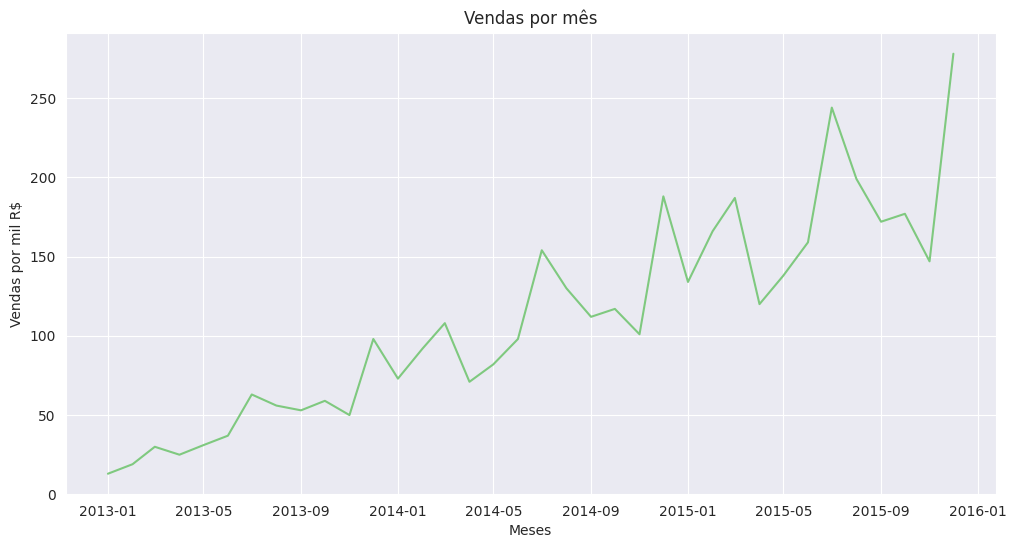

In [28]:
ax = sns.lineplot(x = 'Data', y = 'Vendas do Produto', data = dados_produto)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas por mês')
ax.set_xlabel('Meses')
ax.set_ylabel('Vendas por mil R$')
ax

Para verificar a tendência das vendas e suavizar os efeitos dos ruídos em um curto prazo, diferença entre um mês e outro, pode-se utilizar uma visualiazação com as médias móveis.

In [29]:
dados_produto['media_movel'] = dados_produto['Vendas do Produto'].rolling(5).mean()

<Axes: title={'center': 'Média Móvel das vendas do produto'}, xlabel='Data', ylabel='Vendas do produto'>

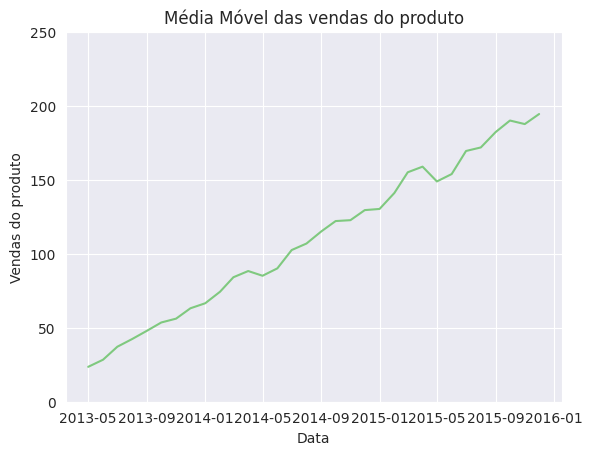

In [30]:
ax = sns.lineplot(x = 'Data', y = 'media_movel', data = dados_produto)
ax.set_title('Média Móvel das vendas do produto')
ax.set_ylim(0,250)
ax.set_xlabel('Data')
ax.set_ylabel('Vendas do produto')
ax

Para que a análise da série temporal fique mais completa realiza-se a decomposição das compontentes desta série. Para tanto será utilizado um dataframe auxiliar para realizar estas operações.

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose

vendas = dados_produto['Vendas do Produto'].values
meses = pd.date_range(start='2014-01-01', periods=36, freq='M')
df = pd.Series(vendas, index = meses)
df

2014-01-31     13
2014-02-28     19
2014-03-31     30
2014-04-30     25
2014-05-31     31
2014-06-30     37
2014-07-31     63
2014-08-31     56
2014-09-30     53
2014-10-31     59
2014-11-30     50
2014-12-31     98
2015-01-31     73
2015-02-28     92
2015-03-31    108
2015-04-30     71
2015-05-31     82
2015-06-30     98
2015-07-31    154
2015-08-31    130
2015-09-30    112
2015-10-31    117
2015-11-30    101
2015-12-31    188
2016-01-31    134
2016-02-29    166
2016-03-31    187
2016-04-30    120
2016-05-31    138
2016-06-30    159
2016-07-31    244
2016-08-31    199
2016-09-30    172
2016-10-31    177
2016-11-30    147
2016-12-31    278
Freq: M, dtype: int64

Daqui nota-se a tendência de aumento com o passar do tempo. Fica muito mais claro os efitos sazonais e os padrões de consumo deste produto. Além disso, o ruído, isto é, a diferença entre os valores observados e os previstos fica evidênciada. Tudo isso capacita o planejamento sobre este produto de modo muito mais preciso e com certa previsibilidade.

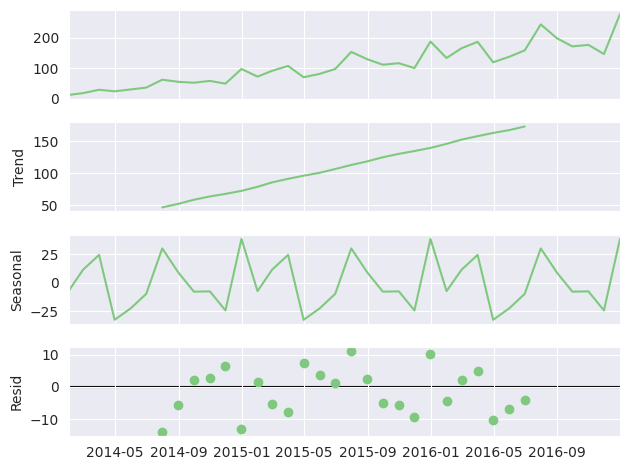

In [32]:
decomposicao = seasonal_decompose(df)
ax = decomposicao.plot()

Caso haja interesse de verificar algum dado específico da tendência ou sazonalidade, até mesmo o ruído, é útil construir um dataframe para isso. Aqui é exemplificado uma porção da tabela.

In [33]:
resultado = pd.DataFrame({
  'observacao' : decomposicao.observed,
  'tendencia' : decomposicao.trend,
  'sazonalidade' : decomposicao.seasonal,
  'ruido' : decomposicao.resid
})

In [34]:
resultado.iloc[7:11]

,observacao,tendencia,sazonalidade,ruido
2014-08-31,56.0,52.541667,8.880208,-5.421875
2014-09-30,53.0,58.833333,-7.953125,2.119792
2014-10-31,59.0,64.000000,-7.703125,2.703125
2014-11-30,50.0,68.041667,-24.411458,6.369792


# Estudo nos dados de vendas diárias e visitantes no site

Os registro da quantidade de vendas diárias se encontram e tabela de dados diário. São referentes aos meses de janeiro e fevereiro de 2015.

In [35]:
dados_diario = pd.read_csv("dados_diario.csv", sep = ';')

In [36]:
dados_diario.head()

,Data,Vendas Quantidade
0,01/01/2015,51
1,02/01/2015,54
2,03/01/2015,18
3,04/01/2015,19
4,05/01/2015,57


Os registro diários dos visitantes no site da empresa se encontram e dados_visitantes. Também são referentes aos meses de janeiro e fevereiro de 2015.

In [37]:
dados_visitantes = pd.read_csv("dados_visitantes.csv", sep=';')

In [38]:
dados_visitantes.head()

,Data,Visitantes no Site
0,01/01/2015,49
1,02/01/2015,46
2,03/01/2015,82
3,04/01/2015,81
4,05/01/2015,43


Com esses dois arquivos deseja-se verificar a relação entre as visitas no site da empresa e nas vendas. Para tanto, será elaborado um novo dataframe para estudo.

In [39]:
visitantes_vendas_diaria = pd.merge(dados_visitantes, dados_diario, on = 'Data', how = 'inner')

In [40]:
visitantes_vendas_diaria.head()

,Data,Visitantes no Site,Vendas Quantidade
0,01/01/2015,49,51
1,02/01/2015,46,54
2,03/01/2015,82,18
3,04/01/2015,81,19
4,05/01/2015,43,57


In [41]:
visitantes_vendas_diaria['Data'] = pd.to_datetime(visitantes_vendas_diaria['Data'], format='%d/%m/%Y')

À partir dos dados, tem-se a impressão de que os dias de mais acesso não correspondem com os dias de maior compra, isto é, as maiores quantidades de acesso são no final de semana, por as maiores quantidade de venda são durante a semana.

<Axes: xlabel='Data', ylabel='Visitantes no Site'>

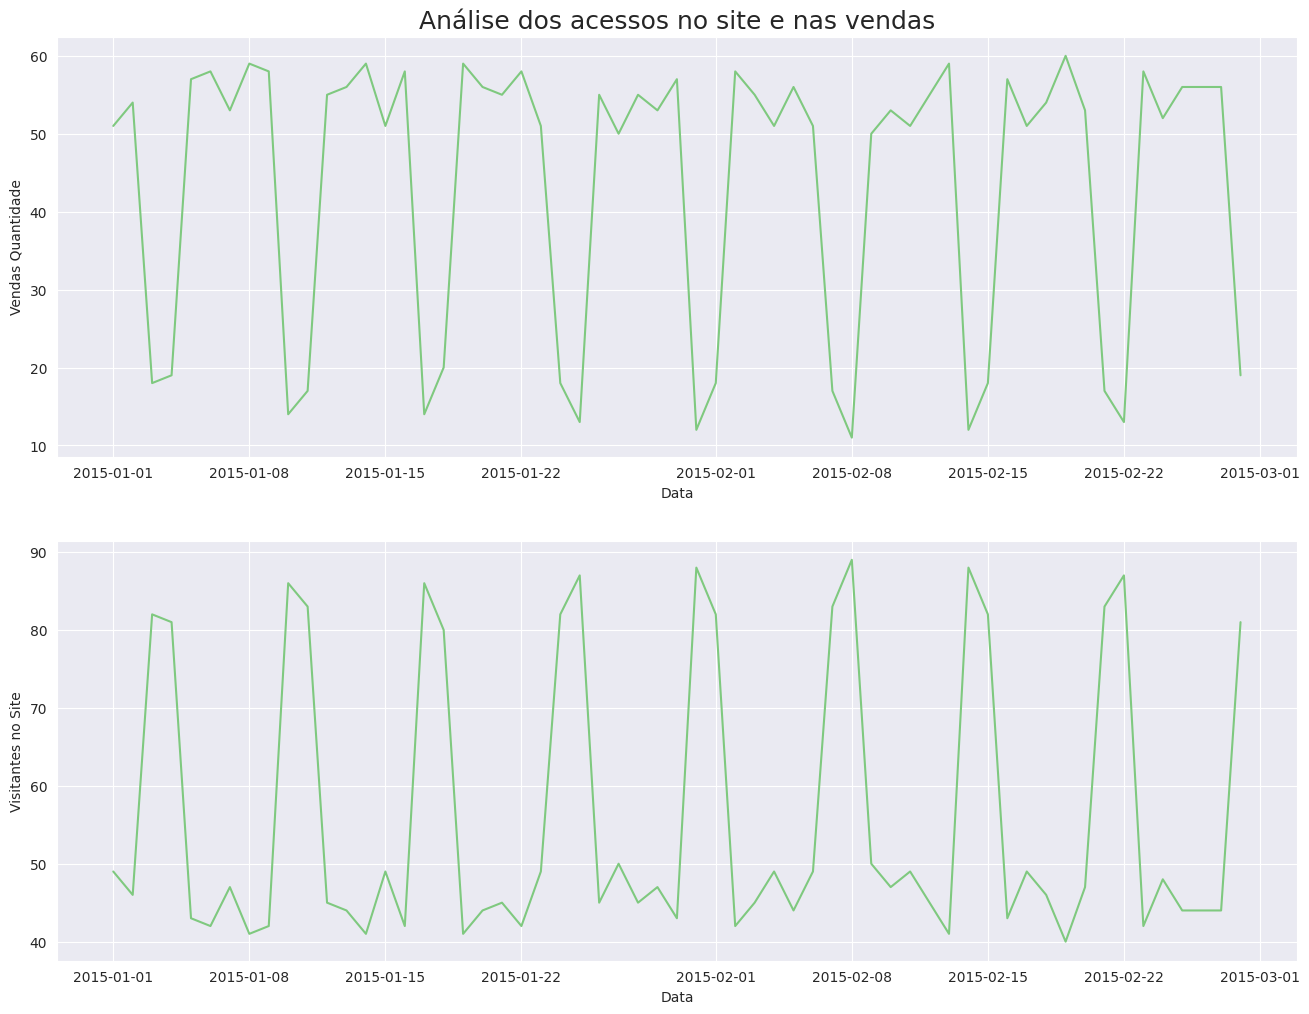

In [42]:
plt.figure(figsize=(16,12))
ax = plt.subplot(2,1,1)
ax.set_title('Análise dos acessos no site e nas vendas', fontsize=18)
ax = sns.lineplot(x = 'Data', y = 'Vendas Quantidade', data = visitantes_vendas_diaria)
plt.subplot(2,1,2)
ax = sns.lineplot(x = 'Data', y = 'Visitantes no Site', data = visitantes_vendas_diaria)
ax

Ao plotar as duas variáveis entre si, fica mais claro este fenômeno. Com isso, podem ser pensadas razões para as vendas e as visitas no site não crescerem juntas. Pode-se sugerir que as pessoas veem o que será comprado no final de semana, mas só realizam a compra durante a semana. De qualquer forma, podem ser elaboradas estratégias para vendar mais no final de semana ou utilizar este comportamento a favor das vendas na semana.

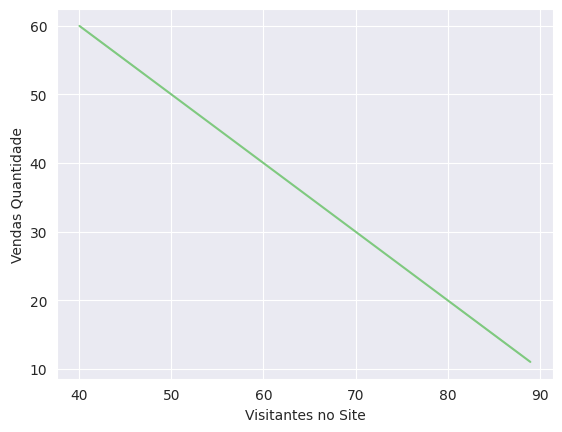

In [43]:
ax = sns.lineplot(x = 'Visitantes no Site', y = 'Vendas Quantidade', data = visitantes_vendas_diaria)

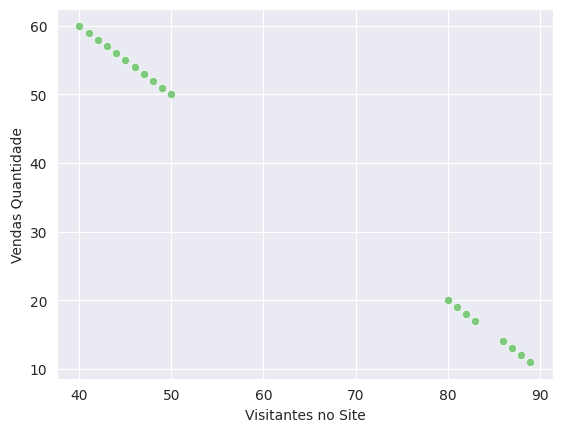

In [44]:
ax = sns.scatterplot(x = visitantes_vendas_diaria['Visitantes no Site'], y = visitantes_vendas_diaria['Vendas Quantidade'], data = visitantes_vendas_diaria )

# Estudo nos dados dos clientes

A tabela de dados dos clientes mostra o número de clientes ativos no mês, bem como o número de clientes que entrou no mês.

In [45]:
dados_clientes = pd.read_csv('dados_clientes.csv', sep =';')

In [46]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Meses            21 non-null     object 
 1   Novos Clientes   21 non-null     float64
 2   Clientes Ativos  21 non-null     float64
dtypes: float64(2), object(1)
memory usage: 632.0+ bytes


In [47]:
dados_clientes.head()

,Meses,Novos Clientes,Clientes Ativos
0,01/01/2014,2.602,14.765
1,02/01/2014,3.177,16.780
2,03/01/2014,3.374,19.122
3,04/01/2014,2.742,20.633
4,05/01/2014,3.418,22.792


Com esses dados é possível verificar o número de clientes que deixaram de ser ativos.

In [48]:
dados_clientes['Novos Clientes'] = (dados_clientes['Novos Clientes']*1000).astype(int)
dados_clientes['Clientes Ativos'] = (dados_clientes['Clientes Ativos']*1000).astype(int)

In [49]:
dados_clientes['Clientes que sairam'] = dados_clientes['Clientes Ativos'] + dados_clientes['Novos Clientes'] - dados_clientes['Clientes Ativos'].shift(-1)

In [50]:
dados_clientes.head()

,Meses,Novos Clientes,Clientes Ativos,Clientes que sairam
0,01/01/2014,2602,14765,587.0
1,02/01/2014,3177,16780,835.0
2,03/01/2014,3374,19122,1863.0
3,04/01/2014,2742,20633,583.0
4,05/01/2014,3418,22792,1797.0


Sabendo o número de clientes que sairam é possível calcular o Churn rate, isto é, a taxa percentual de clientes que sairam pelo conjunto de clientes ativos. Conhecer esta métrica da uma noção numérica da retenção dos clientes, sendo que um valor alto pode indicar problemas no atendimento, no produto ou ainda com a concorrência.

In [51]:
dados_clientes['Taxa de Churn em %'] = dados_clientes['Clientes que sairam']/dados_clientes['Clientes Ativos'] * 100

In [52]:
dados_clientes.head()

,Meses,Novos Clientes,Clientes Ativos,Clientes que sairam,Taxa de Churn em %
0,01/01/2014,2602,14765,587.0,3.975618
1,02/01/2014,3177,16780,835.0,4.976162
2,03/01/2014,3374,19122,1863.0,9.742705
3,04/01/2014,2742,20633,583.0,2.825571
4,05/01/2014,3418,22792,1797.0,7.884345


In [53]:
churn_max = dados_clientes['Taxa de Churn em %'].max().round(2)
data_max = dados_clientes['Meses'][dados_clientes['Taxa de Churn em %'].idxmax()]
print(f"A maior taxa de Churn foi {churn_max} na data de {data_max}")

A maior taxa de Churn foi 10.56 na data de 09/01/2014


# Estudo dos dados da campanha

Na tabela de dados da campanha se encontra o resultado de uma análise coorte, no qual o clientes ativos que entraram através dessa campanha foram acompanhados e com o passar dos meses foi sendo registrados quantos desses clientes continuaram ativos.

In [54]:
dados_campanha = pd.read_csv("dados_campanha.csv", sep=';')

In [55]:
dados_campanha.head()

,Meses,Clientes Ativos
0,01/01/2014,1729
1,02/01/2014,1522
2,03/01/2014,1366
3,04/01/2014,1209
4,05/01/2014,972


A taxa de churn em % pode ser calculado nesse caso relacionando o número de clientes ativos de um mês e o número de clientes ativos do mês seguinte. Assim, por exemplo, do primeiro mês analisado para o segundo houve uma queda de quase 12% dos clientes ativos.

In [56]:
dados_campanha['Churn'] = (dados_campanha['Clientes Ativos'] - dados_campanha['Clientes Ativos'].shift(-1))/dados_campanha['Clientes Ativos']*100

In [57]:
dados_campanha.head()

,Meses,Clientes Ativos,Churn
0,01/01/2014,1729,11.972238
1,02/01/2014,1522,10.249671
2,03/01/2014,1366,11.493411
3,04/01/2014,1209,19.602978
4,05/01/2014,972,14.197531


Com as taxas de churn mensais é possível calcular a taxa de churn média nesse período.

In [58]:
dados_campanha['100% - Churn'] = 100 - dados_campanha['Churn']

In [59]:
from scipy.stats import gmean

tamanho = len(dados_campanha['100% - Churn'])-1
Churn_cem_medio = gmean(dados_campanha['100% - Churn'][0:tamanho])
Churn_medio = 100 - Churn_cem_medio
print(f"A taxa de Churn médio neste período é {Churn_medio.round(2)}%")

A taxa de Churn médio neste período é 14.52%


Com essa taxa de Churn média é possível descobrir qual é o tempo médio que o cliente fica ativo após uma campanha.

In [60]:
Tempo_medio = 1/(Churn_medio/100)
print(f"O tempo médio que o cliente fica ativo é {Tempo_medio.round(2)} meses")

O tempo médio que o cliente fica ativo é 6.89 meses


Sabendo este tempo que o cliente fica ativo pode-se calcular o LTV - o Valor Vitálicio do Cliente - desde que se tenha o valor médio de compra e a frequência média de compra dos clientes ativos

Outro desdobramento importante deste estudo será para o CAC, custo de aquisição de cliente, que é calculado pelo razão entre os custos para adquirir os clientes e o número de novos cliente. Uma vez que sabe-se o tempo médio desse cliente ativo, e quanto eles gastam, pode-se avaliar se vale a pena fazer uma certa campanha ou mover uma quantidade de recursos para obter novos clientes.